<a href="https://colab.research.google.com/github/dhruvsood12/basketball-demo/blob/main/Dhruv_Sood_Basketball_Visual_Tracking_%26_Clustering_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import json

from google.colab import files
uploaded = files.upload()

with open("RaptorsVHornets.json") as f:
    data = json.load(f)


Saving RaptorsVHornets.json to RaptorsVHornets (1).json


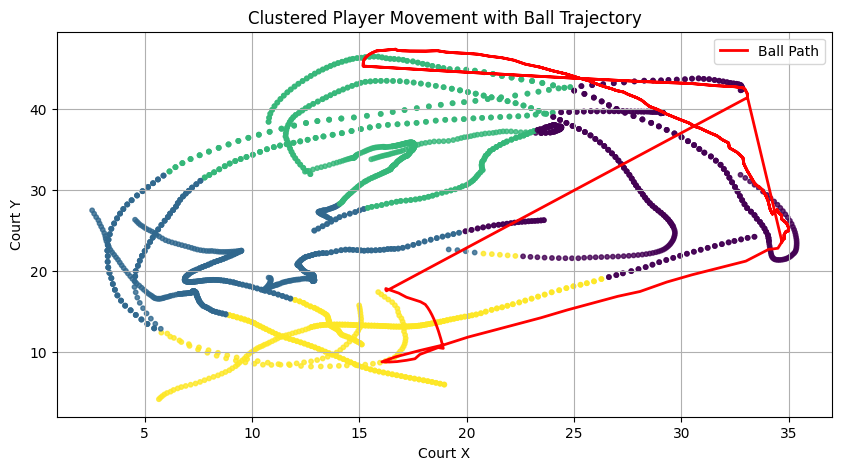

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

positions = []
ball_path = []

for event in data['events'][:3]:
    for moment in event['moments'][:100]:
        frame = moment[5]
        ball = frame[0]
        ball_path.append([ball[2], ball[3]])
        for obj in frame[1:]:
            positions.append([obj[2], obj[3]])

positions = np.array(positions)
ball_path = np.array(ball_path)

kmeans = KMeans(n_clusters=4)
kmeans.fit(positions)
labels = kmeans.labels_

plt.figure(figsize=(10, 5))
plt.scatter(positions[:, 0], positions[:, 1], c=labels, cmap='viridis', s=10, alpha=0.8)
plt.plot(ball_path[:, 0], ball_path[:, 1], color='red', linewidth=2, label='Ball Path')
plt.title("Clustered Player Movement with Ball Trajectory")
plt.xlabel("Court X")
plt.ylabel("Court Y")
plt.grid(True)
plt.legend()
plt.show()


# Player Movement Clustering – Eclipse Challenge

This project looks at movement data from a few possessions in the 2016 Raptors vs Hornets game.

I used player and ball position data, ran KMeans to cluster player movement into patterns, and plotted the ball path over it. The goal was to highlight different roles and motion types across the court.

Clusters help to show visualisations of things like spacing, cuts, and off-ball movement. The red line shows where the ball went in the play, which adds more context to the formations and spacing.

Used: NumPy, Matplotlib, Scikit-learn


In [ ]:
from google.colab import drive
drive.mount('/content/drive')